<a href="https://colab.research.google.com/github/Sherry0072/INSE6220_Project/blob/main/AirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup and Load Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/AirQualityUCI.xlsx"
data = pd.read_excel(file_path)

# Display initial dataset structure
print("Dataset Overview:")
print(data.info())
print(data.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: 

# 2. Preprocess the Data

In [2]:
# Handle missing values (-200 indicates invalid data in this dataset)
data.replace(-200, np.nan, inplace=True)
data.dropna(inplace=True)  # Drop rows with missing values

# Combine Date and Time into a single Datetime column
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Display processed dataset
print("Cleaned Dataset:")
print(data.info())


Cleaned Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 0 to 1230
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         827 non-null    float64       
 1   PT08.S1(CO)    827 non-null    float64       
 2   NMHC(GT)       827 non-null    float64       
 3   C6H6(GT)       827 non-null    float64       
 4   PT08.S2(NMHC)  827 non-null    float64       
 5   NOx(GT)        827 non-null    float64       
 6   PT08.S3(NOx)   827 non-null    float64       
 7   NO2(GT)        827 non-null    float64       
 8   PT08.S4(NO2)   827 non-null    float64       
 9   PT08.S5(O3)    827 non-null    float64       
 10  T              827 non-null    float64       
 11  RH             827 non-null    float64       
 12  AH             827 non-null    float64       
 13  Datetime       827 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(13)
memory usage: 96.9 KB
None


#Exploratory Data Analysis

Correlation Matrix Heatmap

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


Box-and-Whisker Plots

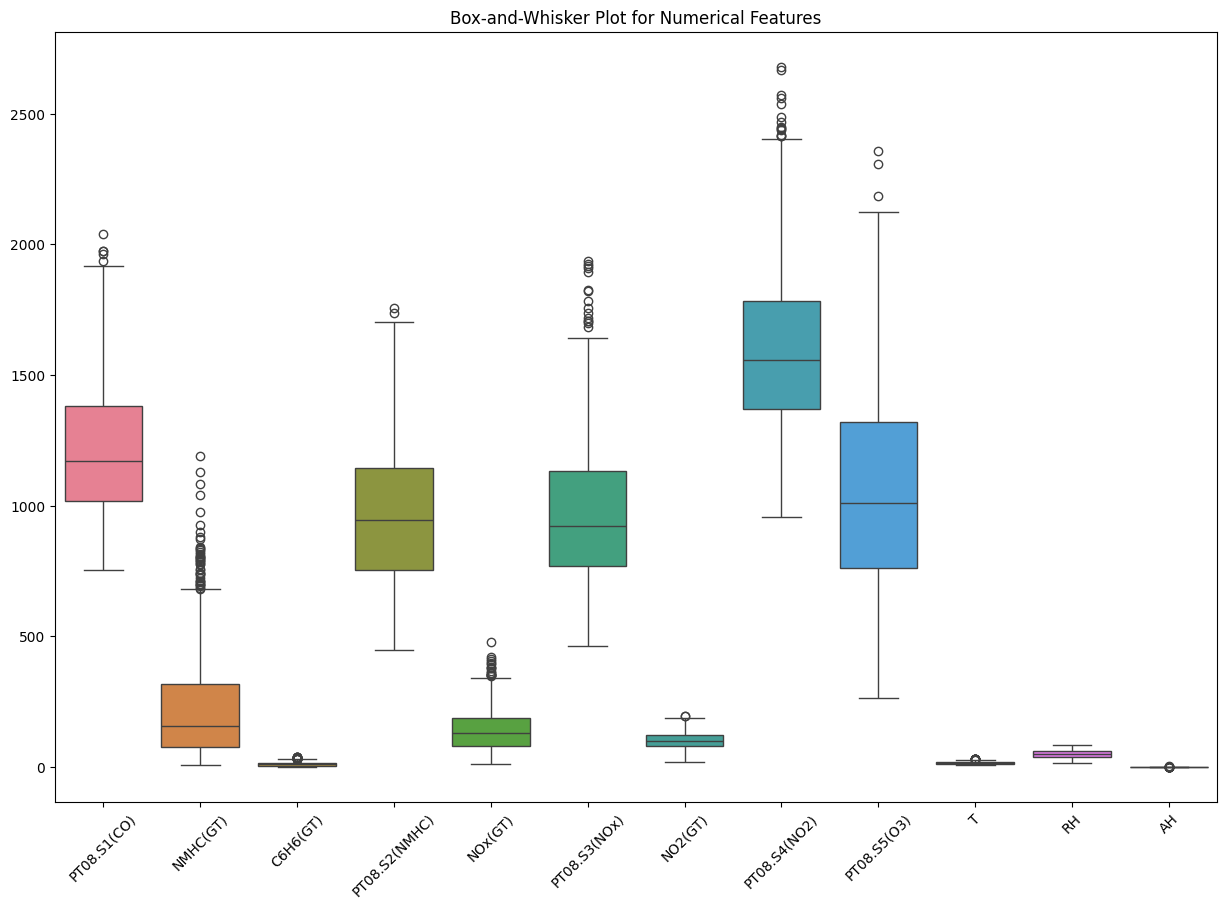

In [4]:
# Plot boxplots for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.drop(['CO(GT)', 'Datetime'], axis=1))
plt.title('Box-and-Whisker Plot for Numerical Features')
plt.xticks(rotation=45)
plt.show()


Pair Plot

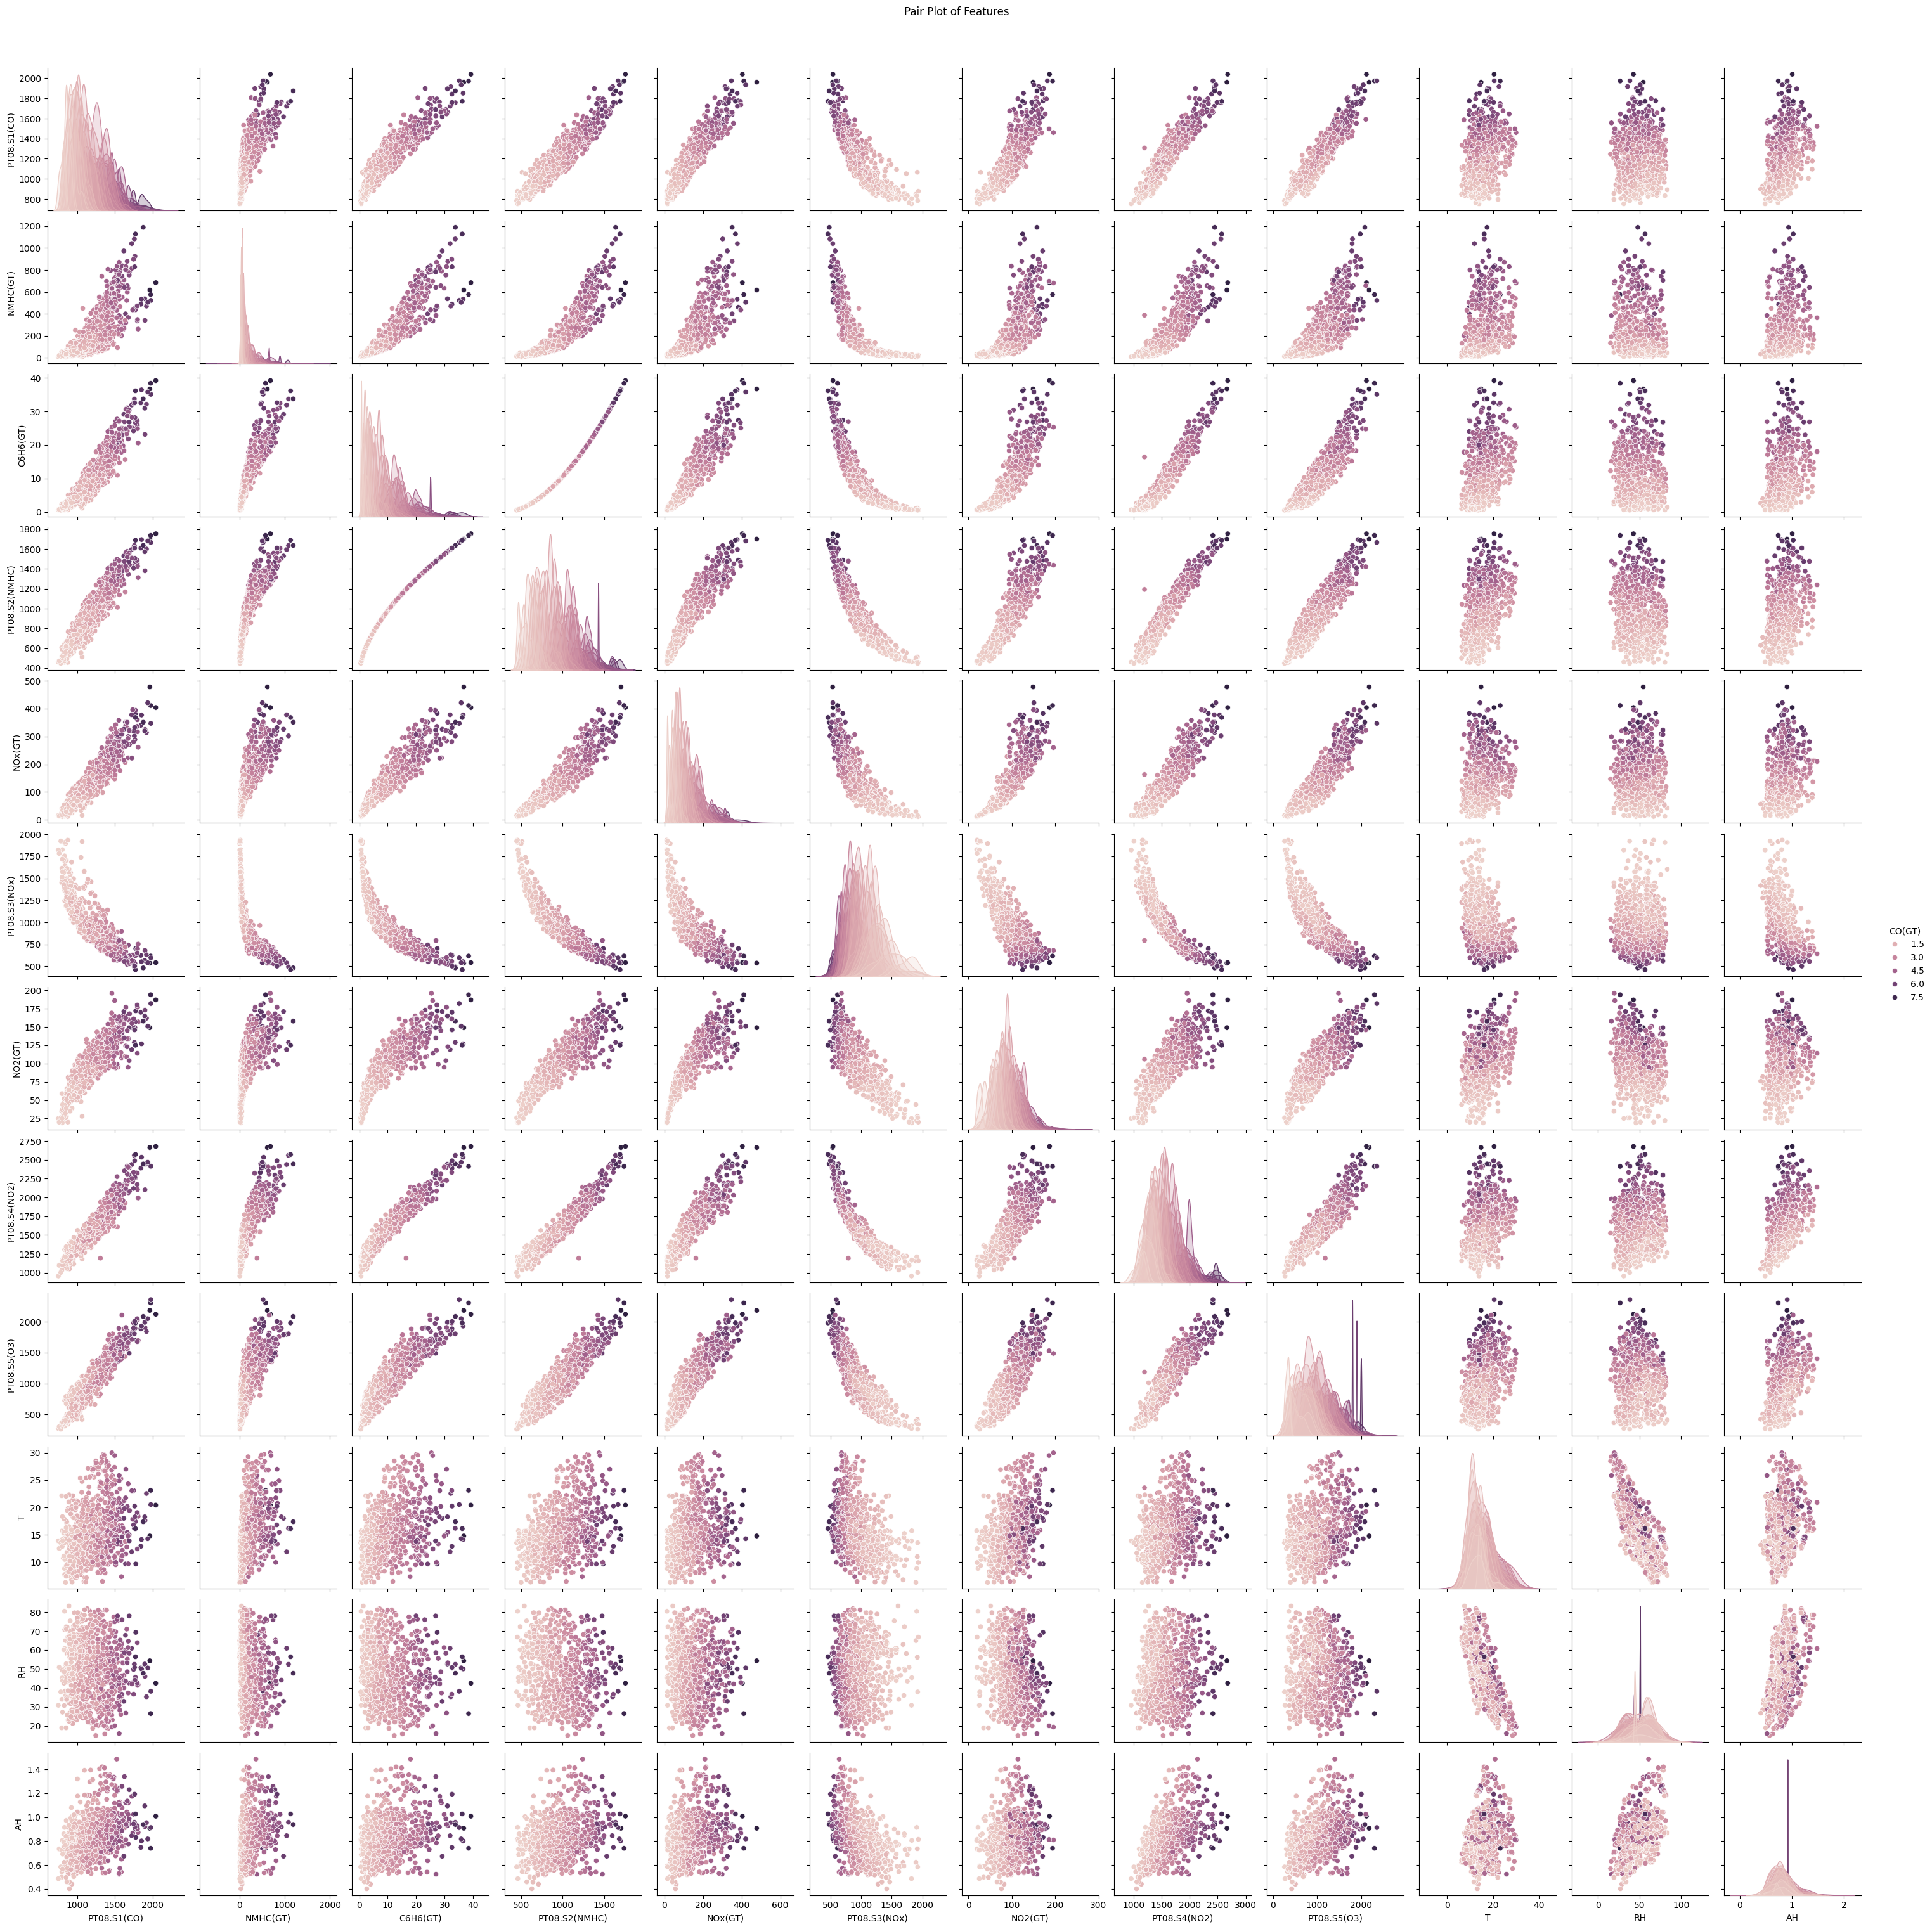

In [5]:
# Pair plot with target hue
sns.pairplot(data, hue='CO(GT)', diag_kind='kde')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()


Histogram for Feature Distribution

In [6]:
# Plot histograms for all features
data.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle('Feature Distribution Histograms', y=1.02)
plt.show()


Scatter Plot with Regression Line

In [7]:
#Scatter plot with regression line for 'CO(GT)' vs another feature
sns.lmplot(x='T', y='CO(GT)', data=data, aspect=1.5, line_kws={"color": "red"})
plt.title('Scatter Plot with Regression Line: Temperature vs CO(GT)')
plt.show()


Outlier Analysis

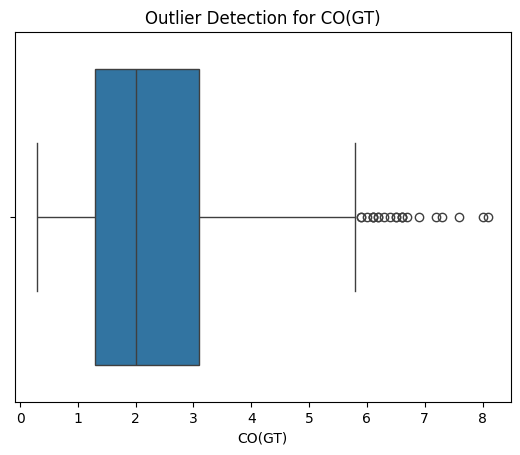

In [8]:
# Detect outliers using a boxplot for a specific feature
sns.boxplot(x=data['CO(GT)'])
plt.title('Outlier Detection for CO(GT)')
plt.show()


# 2. Perform Principal Component Analysis (PCA)

Number of components to retain 90% variance: 3


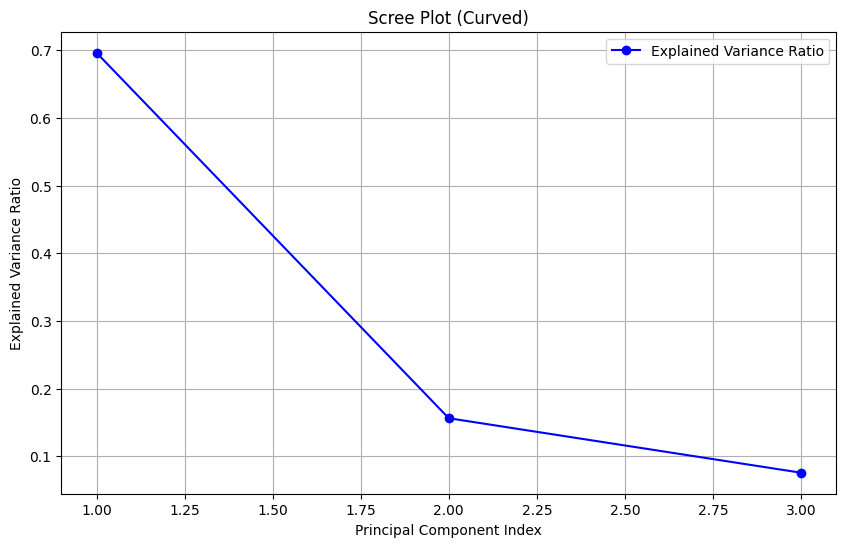

In [9]:
# Separate features and target
features = data.drop(['CO(GT)', 'Datetime'], axis=1)
target = data['CO(GT)']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_features)
explained_variance = pca.explained_variance_ratio_

# Determine the optimal number of components (e.g., 90% variance)
n_components = np.argmax(np.cumsum(explained_variance) >= 0.9) + 1
print(f"Number of components to retain 90% variance: {n_components}")

# Apply PCA with the optimal number of components
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(scaled_features)

# Convert reduced data into a DataFrame for integration
reduced_data_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(n_components)])
reduced_data_df['CO(GT)'] = target  # Add target variable


# Scree Plot (Curved)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_,
         marker='o', linestyle='-', color='b', label='Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (Curved)')
plt.grid()
plt.legend(loc='best')
plt.show()



# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


cleaned_data = reduced_data_df.dropna(subset=['CO(GT)'])

In [10]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Compute covariance matrix
cov_matrix = np.cov(scaled_features.T)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display eigenvalues and eigenvectors
print("Eigenvalues (λ):")
print(eigenvalues)

print("\nEigenvectors (A):")
print(eigenvectors)


pca = PCA(n_components=n_components)  # PCA with optimal components
reduced_data = pca.fit_transform(scaled_features)




Eigenvalues (λ):
[8.36636884e+00 1.87666471e+00 9.08840920e-01 3.21996409e-01
 1.91930152e-01 1.33671072e-01 8.73099624e-02 6.10890652e-02
 3.69645877e-02 1.72067482e-02 3.31963102e-03 9.16574824e-03]

Eigenvectors (A):
[[-0.33105214  0.07224869  0.0726243   0.20621145 -0.38103477 -0.00507661
   0.00869741  0.35381968 -0.73946542 -0.11984496  0.06336048  0.04151394]
 [-0.30358798 -0.03617532  0.09340401 -0.75741962  0.17723496 -0.36774553
  -0.32077255 -0.0770639  -0.19940615 -0.04546323 -0.04347363 -0.07010231]
 [-0.33752627 -0.03428072  0.09746076 -0.20887343 -0.20798424  0.07640568
   0.16560843  0.22385613  0.38882624  0.01192106  0.58654915  0.45801014]
 [-0.34178983 -0.04518699  0.0663328  -0.05380668  0.04976229  0.14766731
   0.20272927  0.23316862  0.20280753 -0.13910224 -0.76536013  0.32838622]
 [-0.32373259  0.06074059  0.25553051  0.06187317 -0.17199177  0.03237277
   0.34586108 -0.81092845 -0.10692452  0.03288605 -0.01832032  0.04098377]
 [ 0.31747536 -0.02410977  0.123213

In [11]:
# Scree Plot for Eigenvalues
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


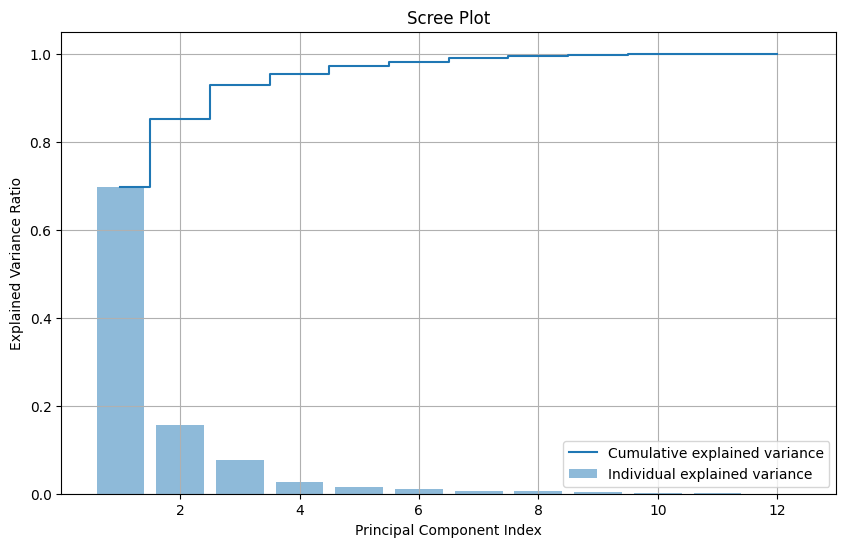

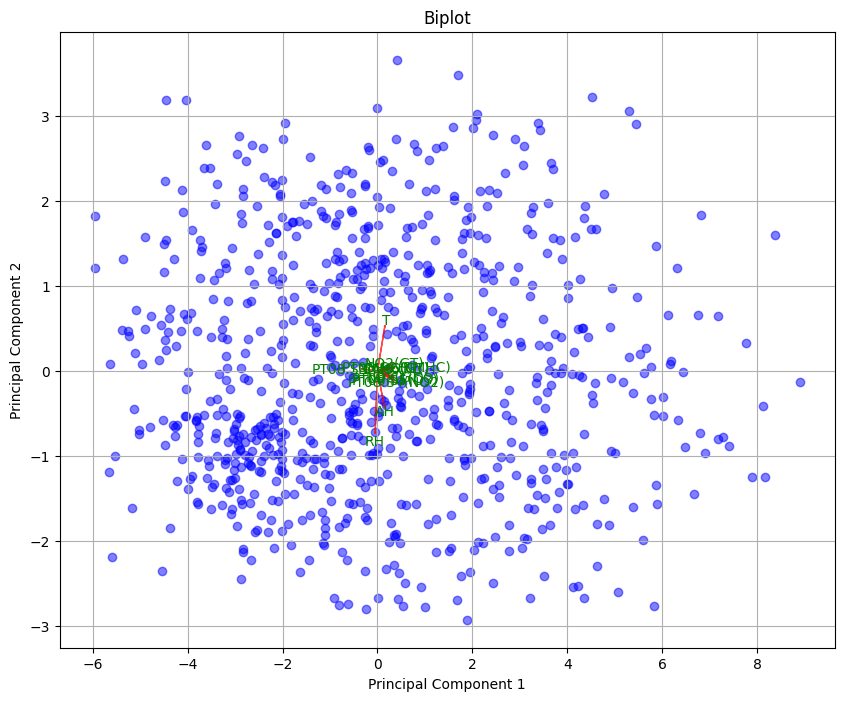

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Reapply PCA to ensure the original PCA object is available
pca_full = PCA()  # Full PCA instance
pca_full.fit(scaled_features)  # Reuse scaled_features from earlier preprocessing

# Eigenvectors (Principal Components)
plt.figure(figsize=(8, 6))
for i, vector in enumerate(pca_full.components_[:2]):  # Use only first two components
    plt.arrow(0, 0, vector[0], vector[1], head_width=0.05, head_length=0.1, color='r', alpha=0.5)
    plt.text(vector[0], vector[1], f'PC{i+1}', color='r')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Eigenvectors of Principal Components')
plt.grid()
plt.show()

# Scree Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca_full.explained_variance_ratio_) + 1), pca_full.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(pca_full.explained_variance_ratio_) + 1), np.cumsum(pca_full.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.grid()
plt.show()

# Explained Variance
explained_variance_cumsum = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_cumsum) + 1), explained_variance_cumsum, marker='o', linestyle='--', color='b')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    plt.figure(figsize=(10, 8))
    plt.scatter(xs, ys, alpha=0.5, color='blue')
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='red', alpha=0.7, head_width=0.02, head_length=0.02)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, f"Var{i+1}", color='green', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='green', ha='center', va='center')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.title('Biplot')
    plt.show()

# Call biplot with PCA results
biplot(pca_result, np.transpose(pca_full.components_), labels=features.columns)


biplot

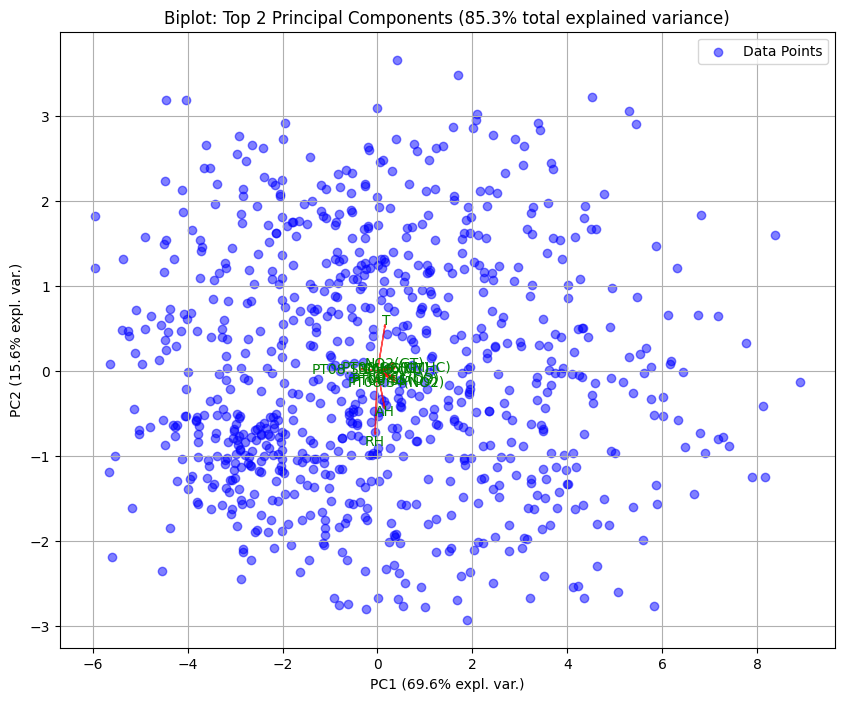

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Assuming 'scaled_features' is the standardized data
pca_full = PCA(n_components=3)  # Retain the top 3 components
pca_result = pca_full.fit_transform(scaled_features)

# Biplot function
def custom_biplot(score, coeff, labels=None, explained_variance=None):
    xs = score[:, 0]
    ys = score[:, 1]

    plt.figure(figsize=(10, 8))
    plt.scatter(xs, ys, alpha=0.5, color='blue', label='Data Points')

    # Plot loadings (arrows)
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='red', alpha=0.7, head_width=0.03, head_length=0.03)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, f"Var{i+1}", color='green', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='green', ha='center', va='center')

    plt.xlabel(f"PC1 ({explained_variance[0]:.1f}% expl. var.)")
    plt.ylabel(f"PC2 ({explained_variance[1]:.1f}% expl. var.)")
    plt.title(f"Biplot: Top 2 Principal Components ({sum(explained_variance[:2]):.1f}% total explained variance)")
    plt.grid()
    plt.legend()
    plt.show()

# Call the custom_biplot function
custom_biplot(
    score=pca_result,
    coeff=np.transpose(pca_full.components_[:2, :]),  # First two components
    labels=features.columns,
    explained_variance=pca_full.explained_variance_ratio_[:2] * 100  # Convert to percentage
)


# 4. Machine Learning with PyCaret

In [14]:
# Install PyCaret if not already installed
!pip install pycaret

from pycaret.regression import *

# Setup PyCaret for regression analysis
reg = setup(data=cleaned_data, target='CO(GT)', session_id=123)

# Compare multiple models automatically
best_model = compare_models()

# Tune the best model
tuned_model = tune_model(best_model)

# Finalize the model
final_model = finalize_model(tuned_model)

# Make predictions on the test dataset
predictions = predict_model(final_model)

# Save the model for reuse
save_model(final_model, 'Best_Regression_Model')



Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PC1', 'PC2', 'PC3'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('actual_estimator',
                  BayesianRidge(alpha_1=0.005, alpha_2=0.1, compute_score=True,
                                lambda_1=0.2, lambda_2=0.001))]),
 'Best_Regression_Model.pkl')

Regression Results

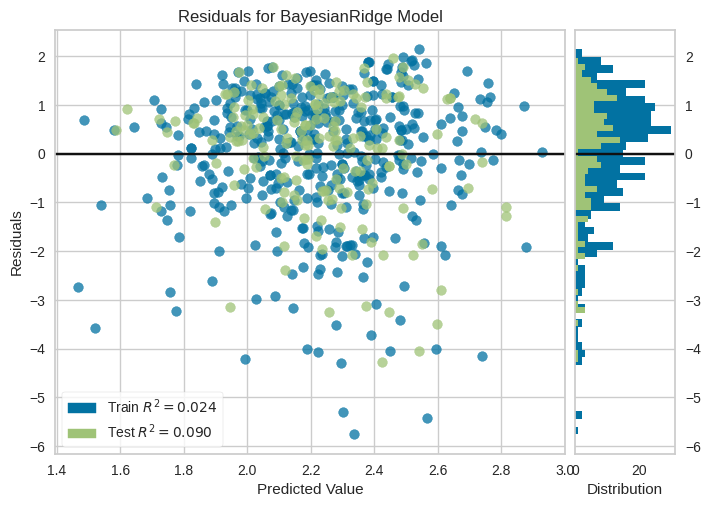

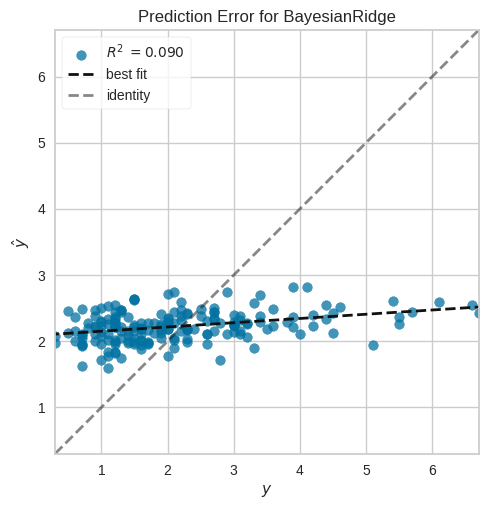

In [15]:
# Display feature importance and residuals
plot_model(final_model, plot='feature')

plot_model(final_model, plot='residuals')
plot_model(final_model, plot='error')




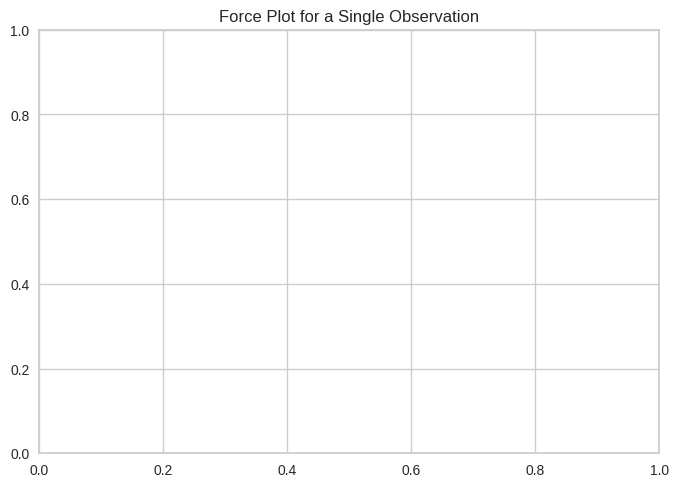

In [18]:
#pip install shap
import shap
import numpy as np
import matplotlib.pyplot as plt

# Ensure all features are numeric
features_for_shap = reduced_data_df.drop(['CO(GT)'], axis=1).select_dtypes(include=[np.number])

# Initialize SHAP explainer
explainer = shap.Explainer(final_model, features_for_shap)

# Generate SHAP values
shap_values = explainer(features_for_shap)

# --- Summary Plot (Fig. 1) ---
plt.title("Summary Plot of SHAP Values")
shap.summary_plot(shap_values, features_for_shap)

# --- Force Plot for a Single Observation (Fig. 2) ---
# Select a single observation
single_observation = features_for_shap.iloc[0, :]  # Adjust the index if needed

# Reshape single_observation to 2D
single_observation_reshaped = single_observation.values.reshape(1, -1)

# Generate SHAP values for the single observation
single_shap_values = explainer(single_observation_reshaped)

# Create the Force Plot
shap.force_plot(
    explainer.expected_value,
    single_shap_values.values,
    single_observation,
    matplotlib=True
)
plt.title("Force Plot for a Single Observation")
plt.show()

import matplotlib.pyplot as plt
import pandas as pd

# Combine features and SHAP values into a DataFrame
shap_summary = pd.DataFrame({
    "Feature": features_for_shap.columns,
    "Mean SHAP Value": mean_shap_values
}).sort_values(by="Mean SHAP Value", ascending=False)

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.barh(shap_summary["Feature"], shap_summary["Mean SHAP Value"], color="skyblue")
plt.xlabel("Mean SHAP Value")
plt.ylabel("Principal Components")
plt.title("Mean SHAP Values of Principal Components")
plt.gca().invert_yaxis()  # Highest values on top
plt.grid(axis="x")
plt.show()


In [17]:
import pandas as pd

# Calculate mean SHAP values for all principal components
mean_shap_values = shap_values.values.mean(axis=0)

# Combine into a DataFrame for easier inspection
shap_summary = pd.DataFrame({
    "Feature": features_for_shap.columns,
    "Mean SHAP Value": mean_shap_values
}).sort_values(by="Mean SHAP Value", ascending=False)

# Print the SHAP value summary
print(shap_summary)



  Feature  Mean SHAP Value
0     PC1        -0.000047
1     PC2        -0.010828
2     PC3        -0.026098


# 5. Classification Task (Optional to get better results)

Missing values in 'QualityLevel': 223
Missing values after cleaning: 0


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


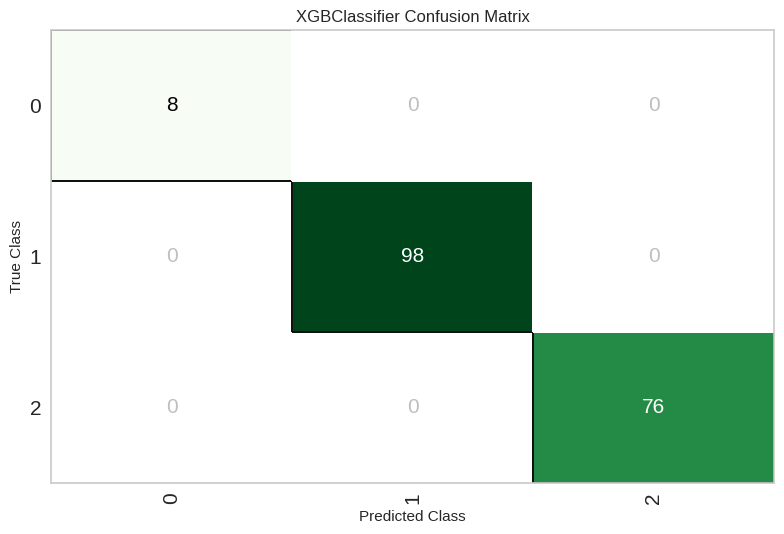

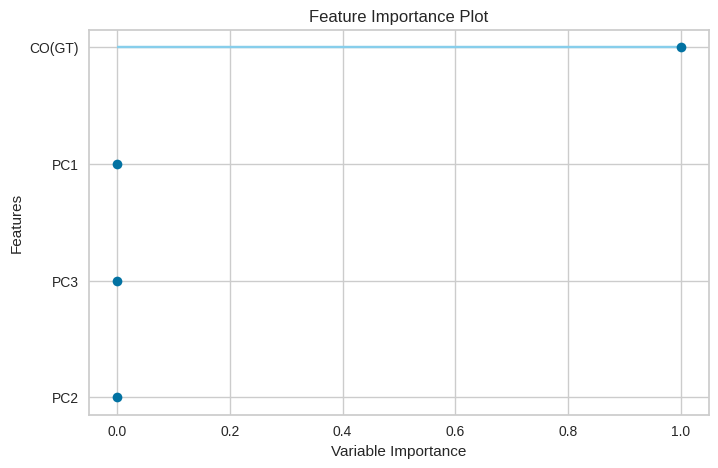

In [19]:
from pycaret.classification import *

# Create a categorical target for classification
reduced_data_df['QualityLevel'] = pd.cut(
    reduced_data_df['CO(GT)'], bins=[0, 2, 5, 10], labels=['Low', 'Moderate', 'High']
)

# Verify missing values in QualityLevel
print(f"Missing values in 'QualityLevel': {reduced_data_df['QualityLevel'].isna().sum()}")

# Drop rows with missing QualityLevel
cleaned_classification_data = reduced_data_df.dropna(subset=['QualityLevel'])

# Confirm no missing values remain
print(f"Missing values after cleaning: {cleaned_classification_data['QualityLevel'].isna().sum()}")

# Setup PyCaret for classification
clf = setup(data=cleaned_classification_data, target='QualityLevel', session_id=123)

# Compare models
best_clf_model = compare_models()

# Tune and finalize the best classification model
tuned_clf_model = tune_model(best_clf_model)
final_clf_model = finalize_model(tuned_clf_model)

# Evaluate the classification model
plot_model(final_clf_model, plot='confusion_matrix')
plot_model(final_clf_model, plot='feature')


# 6. Visualizations and Results for the Report

# PCA Explained Variance Plot

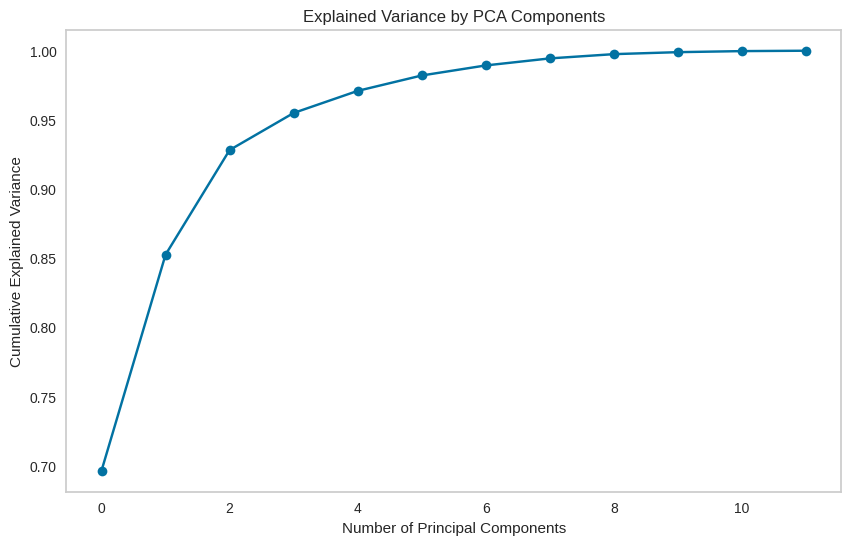

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


Classification Results

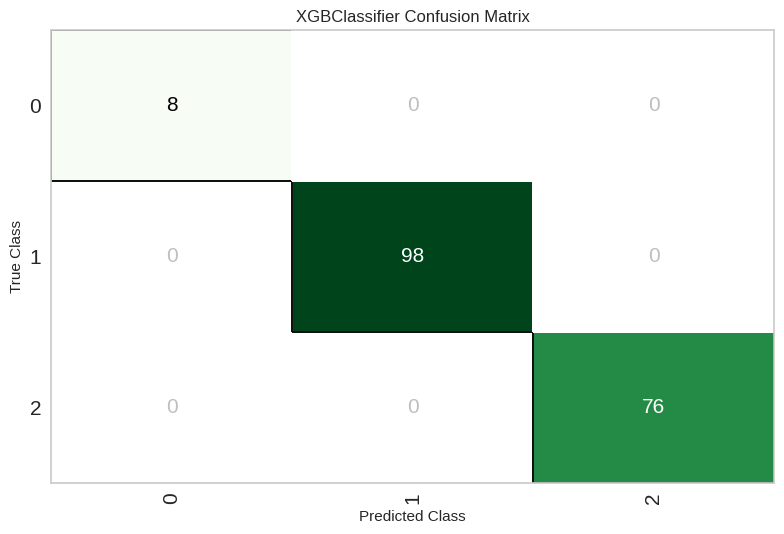

In [21]:
plot_model(final_clf_model, plot='confusion_matrix')
